    Aluno    : Lucas Araujo Azevedo
    Matrícula: 2017104188
[Youtube](https://youtu.be/1oXgXrfqkg4)  
[Github](https://github.com/LucasAzvd/Projeto-Final-ICD)
    
# Temas: Diabetes

### Motivação: 
Verificar a possibilidade de descobrir diabetes a partir de alguns dados sobre a saúde do indivíduo. Possibilitando uma precaução antes mesmo de tê-la, previnindo a doença.

### Perguntas:
Trabalho irá utilizar a base de dados do [Kagle sobre diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database) e focará em tentar resolver as seguintes perguntas:  
+ A grossura da pele do triceps tem alguma relação com a chance de ter diabetes?
+ A gravidez gera uma tendência a ter diabetes?
+ Existe relação entre glicose, insulina, pressão sanguinea?

In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Show Cell'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

import warnings
warnings.filterwarnings('ignore')

hide_toggle()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('diabetes.csv')
hide_toggle()

In [3]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
# Ajustando as colunas
df.columns = ['quant_gravides', 'glicose', 'pressao_sangue', 'pele_triceps', 
              'insulina', 'imc', 'prob_diabetes_familia', 'idade', 'diabetico']
print("Ajustando as colunas")
hide_toggle()

Ajustando as colunas


In [5]:
df.head(2)

,quant_gravides,glicose,pressao_sangue,pele_triceps,insulina,imc,prob_diabetes_familia,idade,diabetico
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


Tendo ajustado o DataFrame, partiremos para a análise de dados, realizando verificações simples sobre balanceamento e buscando alguma relação entre os dados.  
Partindo de uma visão mais simples, dividindo o nosso DataFrame em dois grupos principais: os que são diabéticos e os que não são, para comparar alguns números e buscar algum gráfico normal.

In [6]:
df_diabetico = df[df['diabetico'] == 1]
df_saudavel = df[df['diabetico'] == 0]
hide_toggle()

In [7]:
print("df_diabetico.mean() - df_saudavel.mean()\n")
print(df_diabetico.mean() - df_saudavel.mean())
hide_toggle()

df_diabetico.mean() - df_saudavel.mean()

quant_gravides            1.567672
glicose                  31.277463
pressao_sangue            2.640627
pele_triceps              2.500179
insulina                 31.543821
imc                       4.838337
prob_diabetes_familia     0.120766
idade                     5.877164
diabetico                 1.000000
dtype: float64


Observamos que a insulina e a glicose possuem uma média maior para pessoas diabéticas. Esse fato já era esperado,
 para verificação se não existe possíveis outliers, compararemos a mediana:       

In [8]:
print("Saudáveis")
print(f"Média glicose Saudaveis   : {np.mean(df_saudavel['glicose'])}")
print(f"Mediana glicose Saudaveis : {np.median(df_saudavel['glicose'])}")
print(f"Média insulina Saudaveis  : {np.mean(df_saudavel['insulina'])}")
print(f"Mediana insulina Saudaveis: {np.median(df_saudavel['insulina'])}")
print("\nDiabéticos")
print(f"Média glicose Diabéticos   : {np.mean(df_diabetico['glicose'])}")
print(f"Mediana glicose Diabéticos : {np.median(df_diabetico['glicose'])}")
print(f"Média insulina Diabéticos  : {np.mean(df_diabetico['insulina'])}")
print(f"Mediana insulina Diabéticos: {np.median(df_diabetico['insulina'])}")

print('''
Vemos que Em geral não existe outliers (apenas no caso da insulina em diabéticos)
''')
hide_toggle()

Saudáveis
Média glicose Saudaveis   : 109.98
Mediana glicose Saudaveis : 107.0
Média insulina Saudaveis  : 68.792
Mediana insulina Saudaveis: 39.0

Diabéticos
Média glicose Diabéticos   : 141.25746268656715
Mediana glicose Diabéticos : 140.0
Média insulina Diabéticos  : 100.33582089552239
Mediana insulina Diabéticos: 0.0

Vemos que Em geral não existe outliers (apenas no caso da insulina em diabéticos)



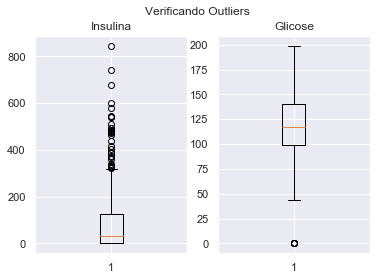

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Verificando Outliers')
ax1.boxplot(df['insulina'])
ax1.set_title("Insulina")

ax2.boxplot(df['glicose'])
ax2.set_title("Glicose")
plt.show()
hide_toggle()

Vamos realizar uma verificação de correlação, para maior simplicidade e melhor visualização, plotaremos um gráfico de calor com as correlações

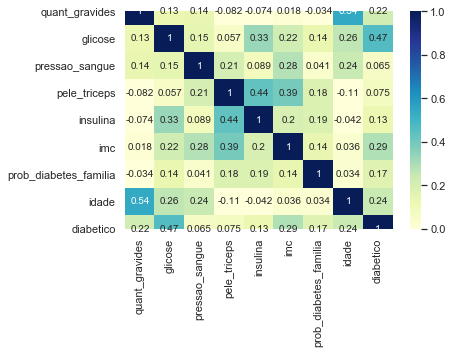

In [10]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, vmin=0, vmax=1)

plt.show()
hide_toggle()

Vemos que não existe uma correlação forte entre nenhum dos dados, mas isso não significa que não podemos utiliza-los  
Vamos explorar mais profundamente o data frame seccionando apenas para as partes importantes para nossa pergunta.  
Sabemos que glicose é fator importante na diabetes, então utilizaremos sempre essa variável como target para comparação dos outros dados. Ela também segue a reta normal mesmo sem a aplicação do Bootstrap

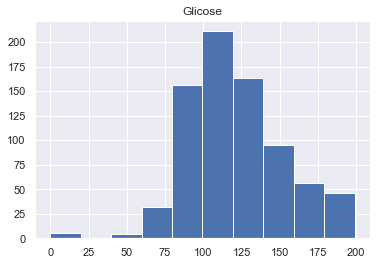

In [11]:
df['glicose'].hist()
plt.title("Glicose")
plt.show()
hide_toggle()

### Primeira pergunta "A grossura da pele do triceps tem alguma relação com a chance de ter diabetes?"

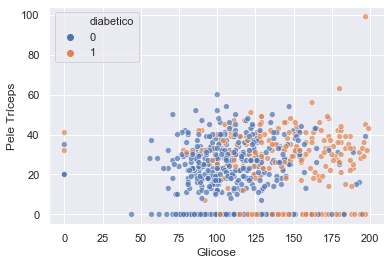

In [12]:
sns.scatterplot(x="glicose", y="pele_triceps", hue="diabetico",
                sizes=(10, 200), data=df, alpha=0.7)
plt.ylabel("Pele Tríceps")
plt.xlabel("Glicose",)
plt.legend()
plt.show()

df_1 = df[['pele_triceps', 'glicose', 'diabetico']]
hide_toggle()

Não existe correlação aparente a partir do gráfico de dispersão

Tentaremos aplicar um modelo de regressão para um teste se realmente não são relacionados e não geram nenhum resultado plausível

In [13]:
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

x = df_1.iloc[:,0:-1]
y = df_1.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

print("Aplicando o KNN\n")
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

predict_knn = neigh.predict(x_test)

print(f"Acurácia: {accuracy_score(y_test, predict_knn)}")
print("\nDistribuições dos acertos\n")
print(classification_report(y_test, predict_knn))

hide_toggle()

Aplicando o KNN

Acurácia: 0.7086614173228346

Distribuições dos acertos

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       168
           1       0.57      0.53      0.55        86

    accuracy                           0.71       254
   macro avg       0.67      0.67      0.67       254
weighted avg       0.70      0.71      0.71       254



In [14]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

hide_toggle()

In [15]:
print("Aplicando uma Regressão Logística")

model_lr.fit(x_train, y_train)

y_pred = model_lr.predict(x_test)

print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print("\n\nDistribuições dos acertos\n")
print(classification_report(y_test, y_pred))

hide_toggle()

Aplicando uma Regressão Logística
Acurácia: 0.7244094488188977


Distribuições dos acertos

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       168
           1       0.62      0.47      0.53        86

    accuracy                           0.72       254
   macro avg       0.69      0.66      0.67       254
weighted avg       0.71      0.72      0.71       254



Utilizando um modelo de regressão observamos que a pele do triceps não é um fator totalmente determinante para a ocorrência do diabetes.

### Segunda pergunta "A gravidez gera uma tendência a ter diabetes?"

In [16]:
df_2 = df[['quant_gravides', 'glicose', 'diabetico']]
hide_toggle()

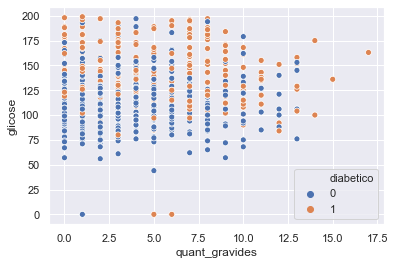

In [17]:
ax = sns.scatterplot(x="quant_gravides", y="glicose", hue="diabetico", data=df_2)
hide_toggle()

Foi adicionado um ruído, para verificação de possíveis clusteres.

In [18]:
n = df_2.shape[0]
df_2['quant_gravides'] = df_2['quant_gravides'] + np.random.normal(0, 0.2, size=n)
hide_toggle()

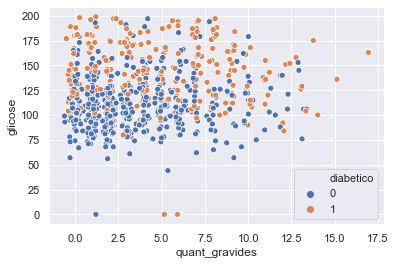

In [19]:
ax = sns.scatterplot(x="quant_gravides", y="glicose", hue="diabetico", data=df_2)
hide_toggle()

Vemos que não existem clusteres e nem uma correção forte entre os eixos

Realizando o mesmo teste aplicado a pele do tríceps

In [20]:
df_2 = df[['quant_gravides', 'insulina', 'diabetico']]
x = df_2.iloc[:,0:-1]
y = df_2.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

print("Aplicando o KNN\n")
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

predict_knn = neigh.predict(x_test)

print(f"Acurácia: {accuracy_score(y_test, predict_knn)}")
print("\nDistribuições dos acertos\n")
print(classification_report(y_test, predict_knn))

hide_toggle()

Aplicando o KNN

Acurácia: 0.594488188976378

Distribuições dos acertos

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       168
           1       0.42      0.51      0.46        86

    accuracy                           0.59       254
   macro avg       0.57      0.57      0.57       254
weighted avg       0.62      0.59      0.60       254



In [21]:
print("Aplicando uma Regressão Logística\n")

model_lr = LogisticRegression()

model_lr.fit(x_train, y_train)

y_pred = model_lr.predict(x_test)

print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print("\n\nDistribuições dos acertos\n")
print(classification_report(y_test, y_pred))
hide_toggle()

Aplicando uma Regressão Logística

Acurácia: 0.6850393700787402


Distribuições dos acertos

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       168
           1       0.59      0.23      0.33        86

    accuracy                           0.69       254
   macro avg       0.64      0.57      0.56       254
weighted avg       0.66      0.69      0.64       254



Obtemos uma performace melhor do que relacionando a pele do tríceps. Porém não temos uma acurácia grande. 

### Terceira pergunta "Existe relação entre glicose, insulina, pressão sanguinea?"

In [22]:
df_3 = df[['glicose', 'pressao_sangue', 'insulina']]
hide_toggle()

In [23]:
print(df_3.corr())
hide_toggle()

                 glicose  pressao_sangue  insulina
glicose         1.000000        0.152590  0.331357
pressao_sangue  0.152590        1.000000  0.088933
insulina        0.331357        0.088933  1.000000


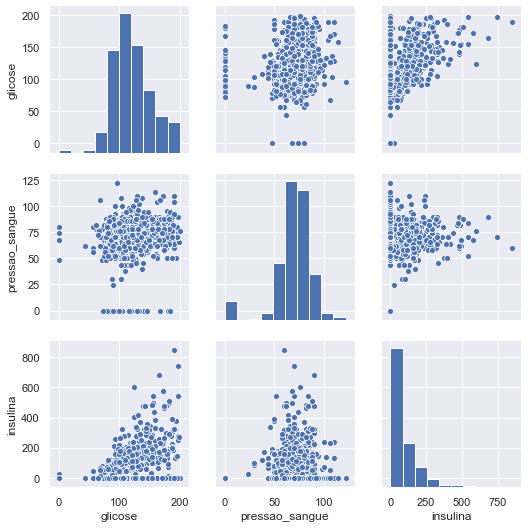

In [24]:
sns.pairplot(df_3)
plt.show()
hide_toggle()

Segundo o [Portal da Educação](https://www.portaleducacao.com.br/conteudo/artigos/enfermagem/funcao-da-insulina-no-corpo/34860):
>A insulina promove o transporte de glicose para essas células de modo idêntico ao das outras células do corpo

Vemos que a influência existe e é biológica, porém no nosso dataframe ela não é forte e não é um fator que influência a pressão sanguínea da pessoa 

## Tentando obter melhores resultados com o DataFrame completo

In [25]:
print("Proporção dentro do Dataframe:")
print(df['diabetico'].value_counts())

hide_toggle()

Proporção dentro do Dataframe:
0    500
1    268
Name: diabetico, dtype: int64


Nosso Dataframe está desbalanceado e ao aplicar algum modelo de Machine Learning ele provavelmente irá ficar enviesado. Para evitar isso, balancearemos o DataFrame.

In [26]:
print(df[df['diabetico'] == 0].sample(frac=0.53)['diabetico'].value_counts())
hide_toggle()

0    265
Name: diabetico, dtype: int64


In [27]:
df_0 = df[df['diabetico'] == 0].sample(frac=0.53)
df_1 = df[df['diabetico'] == 1]

df_balanced = pd.concat([df_0,df_1])
print(df_balanced['diabetico'].value_counts())
hide_toggle()

1    268
0    265
Name: diabetico, dtype: int64


Separando os dados de treino e teste.  
Embaralhamos os dados dentro do Dataframe para que ao treinar o modelo tenha um pouco mais de dificuldade.

In [28]:
from sklearn.utils import shuffle

df_balanced = shuffle(df_balanced, random_state=42)

x = df_balanced.iloc[:,0:-1]
y = df_balanced.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)
hide_toggle()

In [34]:
model_lr = LogisticRegression()

model_lr.fit(x_train, y_train)
hide_toggle()

In [35]:
print("Regressão Logística\n")
y_pred = model_lr.predict(x_test)

print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print("\n\nDistribuições dos acertos\n")
print(classification_report(y_test, y_pred))
print("Verificando a matriz de confusão")
print(metrics.confusion_matrix(y_test, y_pred))
hide_toggle()

Regressão Logística

Acurácia: 0.7954545454545454


Distribuições dos acertos

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        98
           1       0.74      0.83      0.78        78

    accuracy                           0.80       176
   macro avg       0.80      0.80      0.79       176
weighted avg       0.80      0.80      0.80       176

Verificando a matriz de confusão
[[75 23]
 [13 65]]


In [36]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(x_train, y_train)
hide_toggle()

In [40]:
print("Random Forest\n")

predict_rf = model_rf.predict(x_test)

print(f"Acurácia: {accuracy_score(y_test, predict_rf)}")
print("\n\nDistribuições dos acertos\n")
print(classification_report(y_test, predict_rf))
print("Verificando a matriz de confusão")
print(metrics.confusion_matrix(y_test, predict_rf))
hide_toggle()

Random Forest

Acurácia: 0.7215909090909091


Distribuições dos acertos

              precision    recall  f1-score   support

           0       0.78      0.69      0.74        98
           1       0.66      0.76      0.71        78

    accuracy                           0.72       176
   macro avg       0.72      0.73      0.72       176
weighted avg       0.73      0.72      0.72       176

Verificando a matriz de confusão
[[68 30]
 [19 59]]


Temos o RandomForest com desempenho melhor sobre todo o DataFrame, iremos testar o modelo dentro de todos os dados para ter uma acurácia geral final

In [41]:
print("Random Forest")
x_geral = df.iloc[:,0:-1]
y_geral = df.iloc[:,-1]

predict_geral = model_rf.predict(x_geral)

print(f"Acurácia: {accuracy_score(y_geral, predict_geral)}")
print("\n\nDistribuições dos acertos\n")
print(classification_report(y_geral, predict_geral))
print("Verificando a matriz de confusão")
print(metrics.confusion_matrix(y_geral, predict_geral))
hide_toggle()

Random Forest
Acurácia: 0.8255208333333334


Distribuições dos acertos

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       500
           1       0.69      0.91      0.78       268

    accuracy                           0.83       768
   macro avg       0.82      0.84      0.82       768
weighted avg       0.85      0.83      0.83       768

Verificando a matriz de confusão
[[391 109]
 [ 25 243]]


# Aplicando o modelo geral, obtemos uma acurácia de 83%!

### Explicando o motivo de utilização final do RandomForest e não da Regressão (Mesmo com performace inicial melhor):

In [44]:
print("Regressão Logística sobre todos os dados")
x_geral = df.iloc[:,0:-1]
y_geral = df.iloc[:,-1]

predict_geral = model_lr.predict(x_geral)

print(f"Acurácia: {accuracy_score(y_geral, predict_geral)}")
print("\n\nDistribuições dos acertos\n")
print(classification_report(y_geral, predict_geral))
print("Verificando a matriz de confusão")
print(metrics.confusion_matrix(y_geral, predict_geral))
hide_toggle()

Regressão Logística sobre todos os dados
Acurácia: 0.74609375


Distribuições dos acertos

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       500
           1       0.60      0.79      0.68       268

    accuracy                           0.75       768
   macro avg       0.73      0.76      0.74       768
weighted avg       0.77      0.75      0.75       768

Verificando a matriz de confusão
[[361 139]
 [ 56 212]]


# Acurácia do RandomForest é maior que a da Regressão!